<div style="
    padding: 20px;
    color: white;
    margin: 0;
    font-size: 300%;
    font-weight: 800;
    text-align: center;
    display: fill;
    border-radius: 60px;
    background-color: #D8D8D8;
    box-shadow: 0 4px 8px rgba(0, 0, 0, 0.2);
    text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5);
">
    New York Air Quality <br>
    (EDA / Machine learning)
</div>

# **<div style="display: inline-block; border: 5px solid blue; padding: 15px 10px; border-radius: 5px; font-size: 35px;"> Project. New York Air Quality</div>**


## Goal
> ## EDA : Column Analysis, Column Correlation Analysis
> ## Modeling : Predicting Air Quality

# <div style="display: inline-block; padding: 20px 20px; border-radius: 15px; background: linear-gradient(135deg, #d8bfd8, #8b008b); box-shadow: 3px 3px 8px rgba(0, 0, 0, 0.2); font-size: 35px; font-family: Arial, sans-serif; color: #ffffff; text-align: center;">Import Libraries & Read Dataset</div>

In [1]:
# For EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# For model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression, BayesianRidge
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.exceptions import FitFailedWarning

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.simplefilter("ignore", FitFailedWarning)

In [2]:
df = pd.read_csv('/kaggle/input/new-york-air-quality/updated_air_quality_data.csv')
df.head()

,Unique ID,Name,Measure,Geo Type Name,Geo Place Name,Time Period,Start_Date,Data Value,Air Quality Category
0,179772,Emissions,Density,UHF42,Queens,Other,2015-01-01,0.3,Good
1,179785,Emissions,Density,UHF42,Unknown,Other,2015-01-01,1.2,Good
2,178540,General Pollution,Miles,UHF42,Unknown,Annual Average,2011-12-01,8.6,Good
3,178561,General Pollution,Miles,UHF42,Queens,Annual Average,2011-12-01,8.0,Good
4,823217,General Pollution,Miles,UHF42,Queens,Summer,2022-06-01,6.1,Good


In [3]:
df.drop('Unique ID', axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18016 entries, 0 to 18015
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Name                  18016 non-null  object 
 1   Measure               18016 non-null  object 
 2   Geo Type Name         18016 non-null  object 
 3   Geo Place Name        18016 non-null  object 
 4   Time Period           18016 non-null  object 
 5   Start_Date            18016 non-null  object 
 6   Data Value            18016 non-null  float64
 7   Air Quality Category  18016 non-null  object 
dtypes: float64(1), object(7)
memory usage: 1.1+ MB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Data Value,18016.0,21.412678,23.976151,0.0,8.9,15.2,26.7,424.7


In [5]:
df.describe(include = 'object').T

,count,unique,top,freq
Name,18016,4,General Pollution,15808
Measure,18016,4,Miles,14922
Geo Type Name,18016,5,UHF42,7140
Geo Place Name,18016,6,Unknown,14546
Time Period,18016,4,Summer,6063
Start_Date,18016,43,2015-01-01,906
Air Quality Category,18016,3,Moderate,7018


# <div style="display: inline-block; padding: 20px 20px; border-radius: 15px; background: linear-gradient(135deg, #d8bfd8, #8b008b); box-shadow: 3px 3px 8px rgba(0, 0, 0, 0.2); font-size: 35px; font-family: Arial, sans-serif; color: #ffffff; text-align: center;">Data preprocessing</div>

In [6]:
print("Missing Value (%)")
missing_values = df.isna().mean() * 100
print(missing_values)

print("\nDuplicate Rows (%):")
duplicate_count = df.duplicated().mean()
print(duplicate_count)

Missing Value (%)
Name                    0.0
Measure                 0.0
Geo Type Name           0.0
Geo Place Name          0.0
Time Period             0.0
Start_Date              0.0
Data Value              0.0
Air Quality Category    0.0
dtype: float64

Duplicate Rows (%):
0.24050843694493784


In [7]:
df.drop_duplicates(inplace = True)
print("\nDuplicate Rows (%):")
duplicate_count = df.duplicated().mean()
print(duplicate_count)


Duplicate Rows (%):
0.0


In [8]:
def outlier_check(row, colname):  
    Q1 = row[colname].quantile(0.25)
    Q3 = row[colname].quantile(0.75)
    IQR = Q3 - Q1
    lower_b = Q1 - 1.5 * IQR
    upper_b = Q3 + 1.5 * IQR
    outlier = row.loc[(row[colname] < lower_b) | (row[colname] > upper_b)]
    return outlier
    
outliers = pd.DataFrame() 

for col in df.select_dtypes(include=['number']).columns: 
    outliers_in_col = outlier_check(df, col) 
    outliers = pd.concat([outliers, outliers_in_col])

outliers.reset_index(drop=True, inplace=True)
outliers

,Name,Measure,Geo Type Name,Geo Place Name,Time Period,Start_Date,Data Value,Air Quality Category
0,Asthma-Related,Rates,UHF42,Unknown,Other,2009-01-01,81.7,Bad
1,Asthma-Related,Rates,UHF42,Queens,Other,2009-01-01,80.0,Bad
2,Asthma-Related,Rates,UHF42,Unknown,Other,2009-01-01,115.8,Bad
3,Asthma-Related,Rates,UHF42,Unknown,Other,2015-01-01,69.6,Bad
4,Asthma-Related,Rates,UHF42,Unknown,Other,2015-01-01,81.6,Bad
...,...,...,...,...,...,...,...,...
889,General Pollution,Miles,CD,Unknown,Other,2005-01-01,62.3,Bad
890,General Pollution,Miles,CD,Unknown,Other,2005-01-01,123.9,Bad
891,General Pollution,Miles,CD,Unknown,Other,2005-01-01,72.9,Bad
892,General Pollution,Miles,UHF42,Unknown,Other,2005-01-01,121.3,Bad


# <div style="display: inline-block; padding: 20px 20px; border-radius: 15px; background: linear-gradient(135deg, #d8bfd8, #8b008b); box-shadow: 3px 3px 8px rgba(0, 0, 0, 0.2); font-size: 35px; font-family: Arial, sans-serif; color: #ffffff; text-align: center;">EDA : Data Distribution</div>


Value Counts for Name
Name
General Pollution    11859
Asthma-Related        1231
Hospitalizations       376
Emissions              217
Name: count, dtype: int64


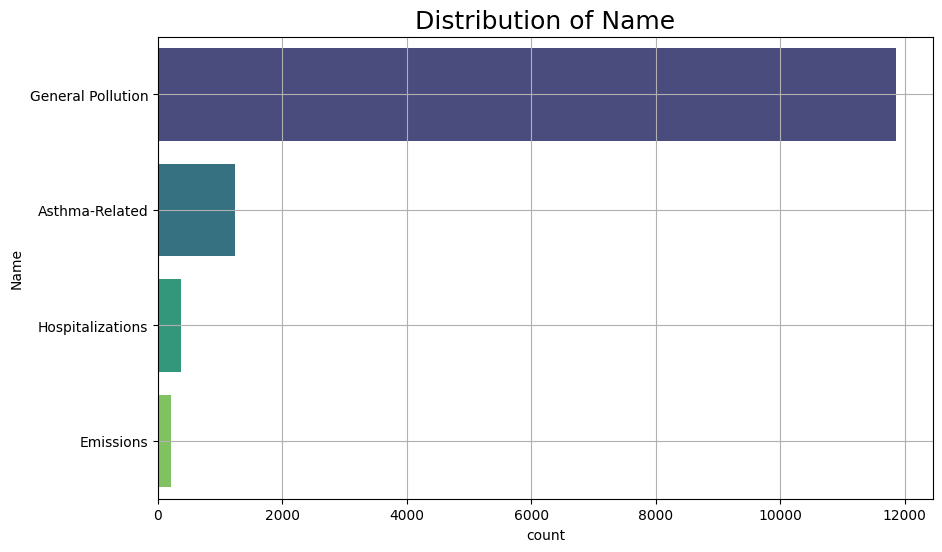


Value Counts for Measure
Measure
Miles            11308
Rates             1993
Density            217
Concentration      165
Name: count, dtype: int64


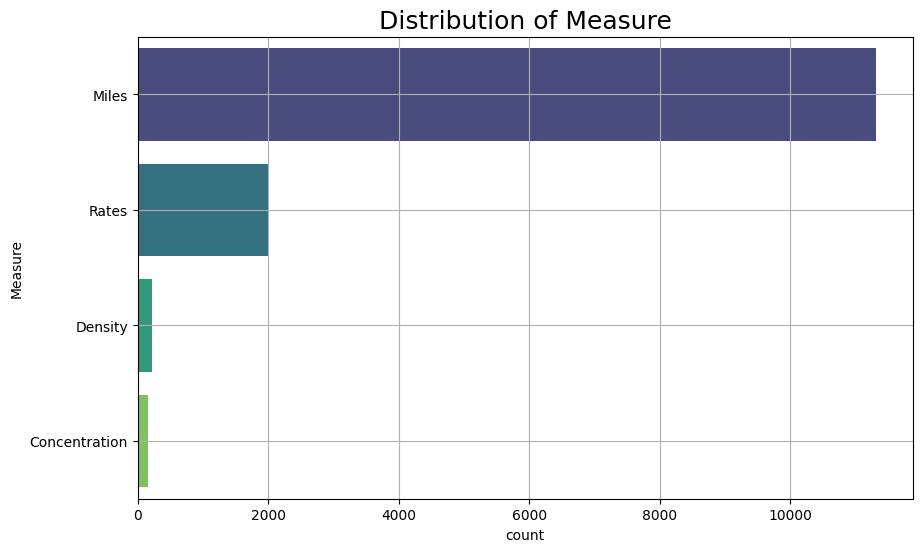


Value Counts for Geo Type Name
Geo Type Name
UHF42       5540
CD          4325
UHF34       2799
Borough      849
Citywide     170
Name: count, dtype: int64


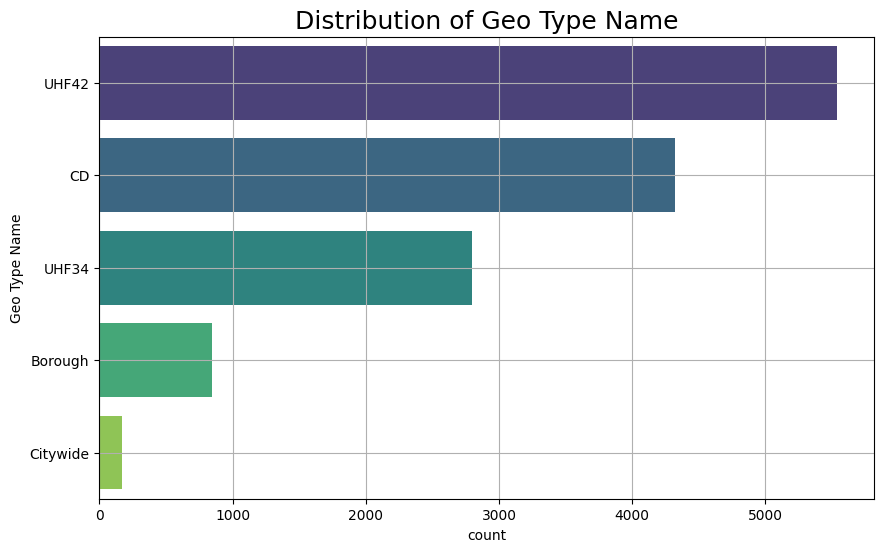


Value Counts for Geo Place Name
Geo Place Name
Unknown          10288
Queens            1433
Bronx              886
Manhattan          438
Staten Island      358
Brooklyn           280
Name: count, dtype: int64


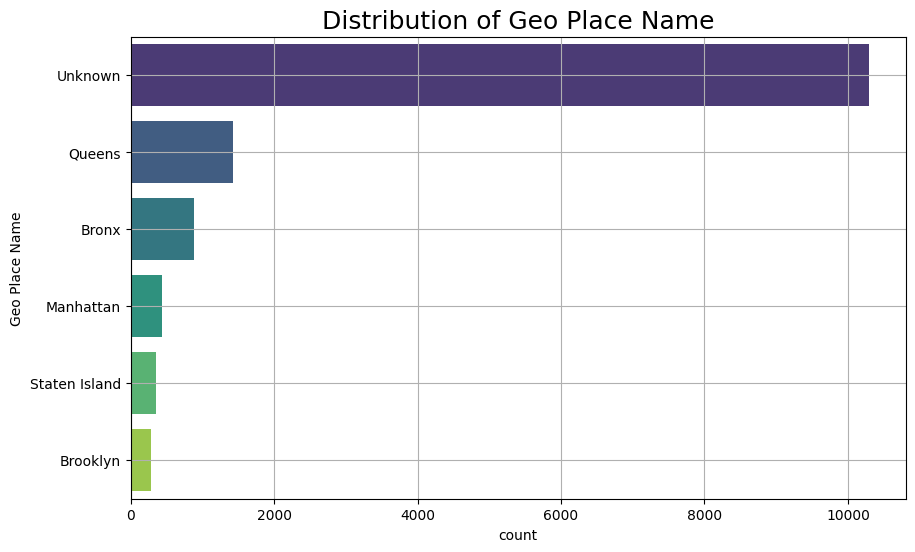


Value Counts for Time Period
Time Period
Summer            4499
Other             3252
Winter            2987
Annual Average    2945
Name: count, dtype: int64


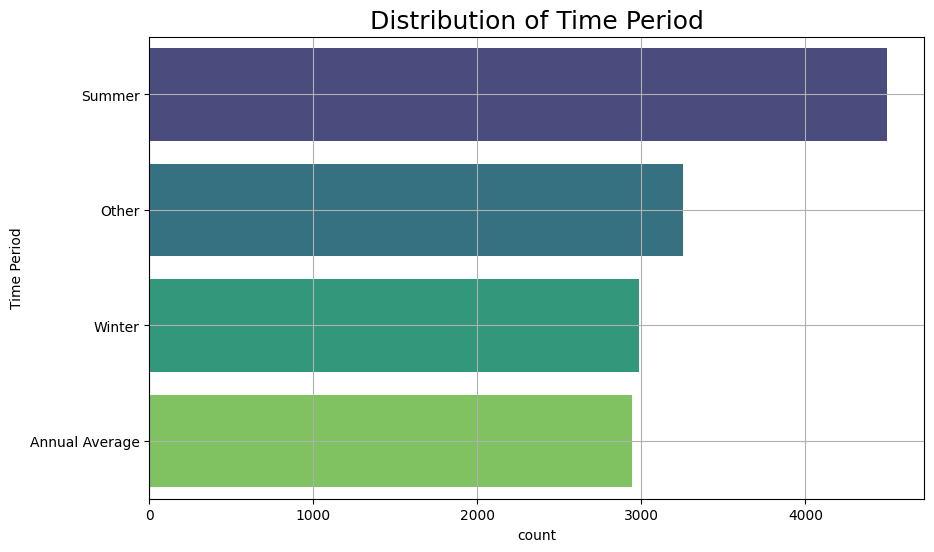


Value Counts for Air Quality Category
Air Quality Category
Moderate    5681
Bad         4430
Good        3572
Name: count, dtype: int64


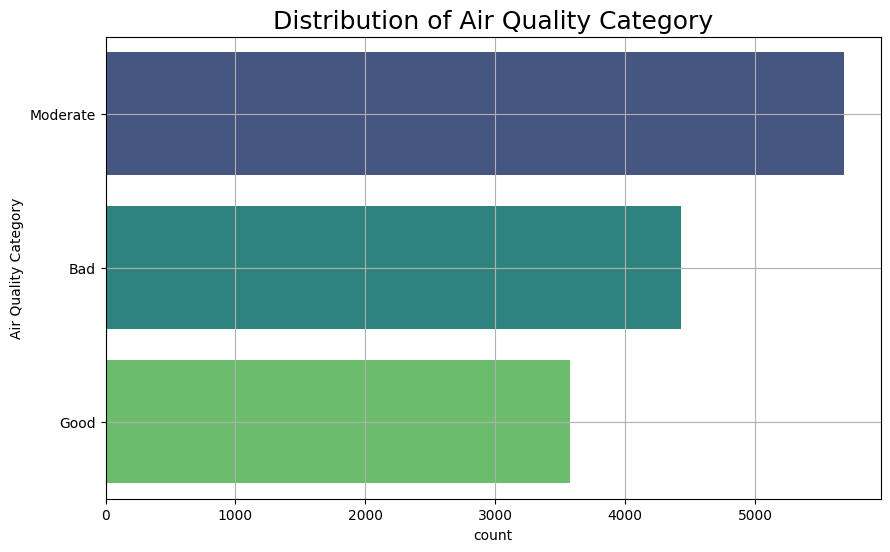

In [9]:
categorical_columns = ["Name", "Measure", "Geo Type Name", "Geo Place Name", "Time Period", "Air Quality Category"]
for col in categorical_columns:
    print(f"\nValue Counts for {col}")
    print(df[col].value_counts())
    plt.figure(figsize=(10, 6))
    sns.countplot(y=df[col], order=df[col].value_counts().index, palette="viridis")
    plt.title(f"Distribution of {col}", fontsize=18)
    plt.grid()
    plt.show()

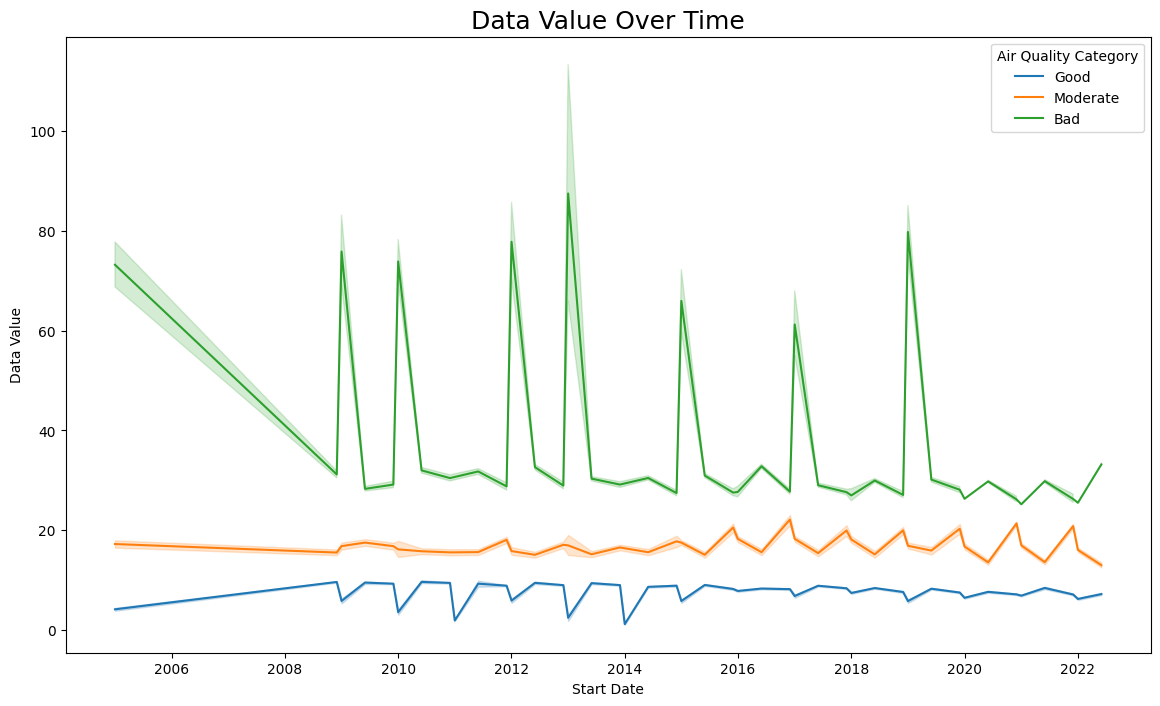

In [10]:
df["Start_Date"] = pd.to_datetime(df["Start_Date"])  
plt.figure(figsize=(14, 8))
sns.lineplot(data=df, x="Start_Date", y="Data Value", hue="Air Quality Category", palette="tab10")
plt.title("Data Value Over Time", fontsize=18)
plt.xlabel("Start Date")
plt.ylabel("Data Value")
plt.legend(title="Air Quality Category")
plt.show()

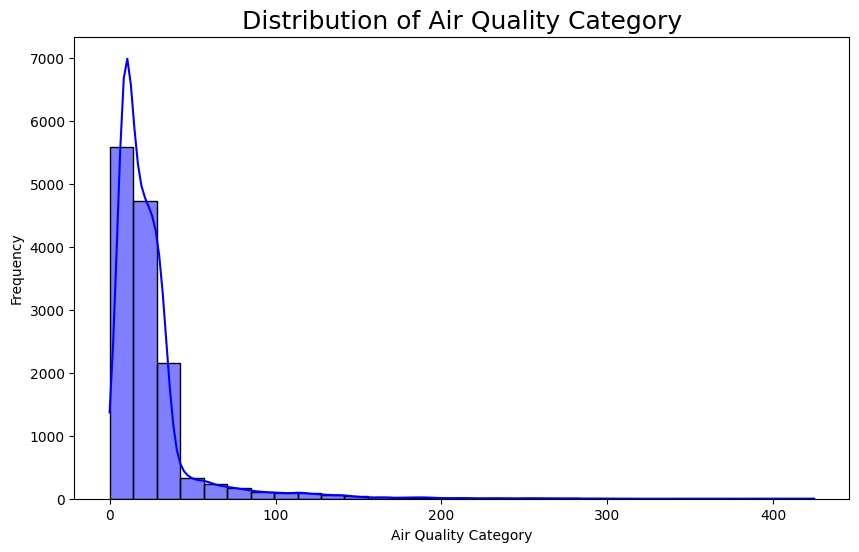

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Data Value'], kde=True, bins=30, color="blue")
plt.title(f"Distribution of {col}", fontsize=18)
plt.xlabel(col)
plt.ylabel("Frequency")
plt.show()

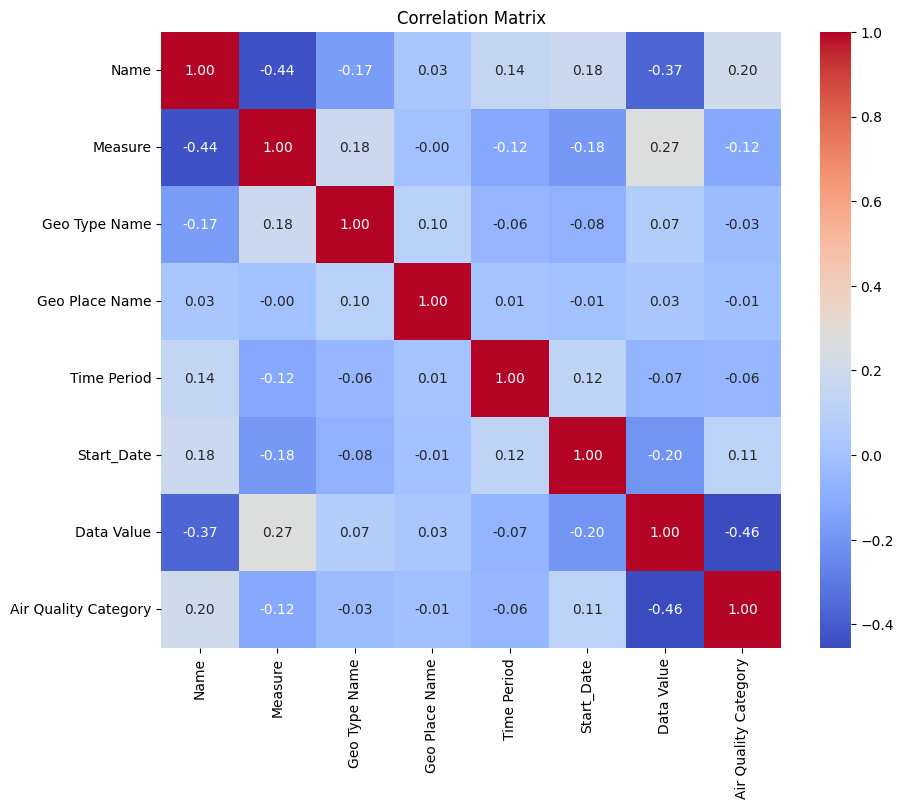

In [12]:
# Correlation Analysis

label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  

correlation_matrix = df.corr()


plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)
plt.title("Correlation Matrix")
plt.show()

# <div style="display: inline-block; padding: 20px 20px; border-radius: 15px; background: linear-gradient(135deg, #d8bfd8, #8b008b); box-shadow: 3px 3px 8px rgba(0, 0, 0, 0.2); font-size: 35px; font-family: Arial, sans-serif; color: #ffffff; text-align: center;">Comparison of classification model performance</div>

In [13]:
X = df.drop(['Air Quality Category','Start_Date'], axis=1)
y = df['Air Quality Category']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


models = {
    "Logistic Regression": LogisticRegression(max_iter=10000, random_state=42),
    "SVM": SVC(kernel='rbf', C=1.0, probability=True, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=3),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(n_estimators=100, random_state=42),
    "MLP Classifier": MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42),
}

def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)  
    y_pred = model.predict(X_test)  
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    return accuracy, precision, recall, f1

In [14]:
results = []

for name, model in models.items():
    accuracy, precision, recall, f1 = evaluate_model(model, X_train_scaled, X_test_scaled, y_train, y_test)
    results.append({
        "Model": name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1
    })

results_df = pd.DataFrame(results)
results_df

,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.983559,0.983941,0.983559,0.983560
1,SVM,0.957252,0.958446,0.957252,0.957329
2,KNN,0.987212,0.987213,0.987212,0.987211
3,Decision Tree,1.000000,1.000000,1.000000,1.000000
4,Random Forest,1.000000,1.000000,1.000000,1.000000
5,XGBoost,0.997442,0.997447,0.997442,0.997443
6,MLP Classifier,0.993789,0.993818,0.993789,0.993786



Best Model:
Model        Decision Tree
Accuracy               1.0
Precision              1.0
Recall                 1.0
F1-Score               1.0
Name: 3, dtype: object


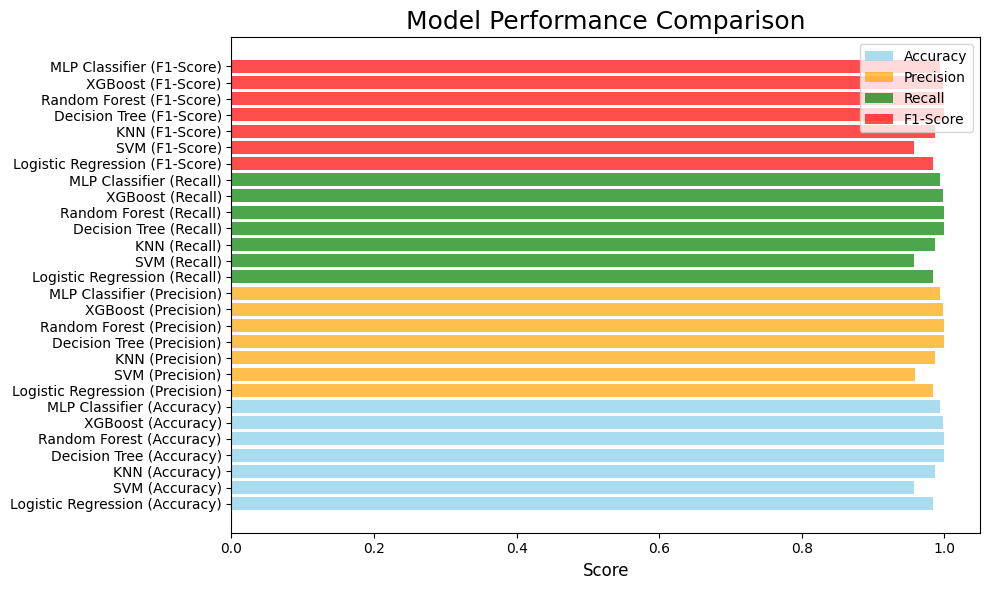


Optimal Model based on Accuracy: Decision Tree with Accuracy = 1.0000


In [15]:
best_model = results_df.loc[results_df['Accuracy'].idxmax()]
print("\nBest Model:")
print(best_model)

metrics = ["Accuracy", "Precision", "Recall", "F1-Score"]
colors = ["skyblue", "orange", "green", "red"]

fig, ax = plt.subplots(figsize=(10, 6))

for i, metric in enumerate(metrics):
    ax.barh(results_df['Model'] + f" ({metric})", results_df[metric], color=colors[i], alpha=0.7, label=metric)

ax.set_xlabel("Score", fontsize=12)
ax.set_title("Model Performance Comparison", fontsize=18)
ax.legend()
plt.tight_layout()
plt.show()

print(f"\nOptimal Model based on Accuracy: {best_model['Model']} with Accuracy = {best_model['Accuracy']:.4f}")

# <div style="display: inline-block; padding: 20px 20px; border-radius: 15px; background: linear-gradient(135deg, #d8bfd8, #8b008b); box-shadow: 3px 3px 8px rgba(0, 0, 0, 0.2); font-size: 35px; font-family: Arial, sans-serif; color: #ffffff; text-align: center;">Conclusion</div>


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       842
           1       1.00      1.00      1.00       691
           2       1.00      1.00      1.00      1204

    accuracy                           1.00      2737
   macro avg       1.00      1.00      1.00      2737
weighted avg       1.00      1.00      1.00      2737



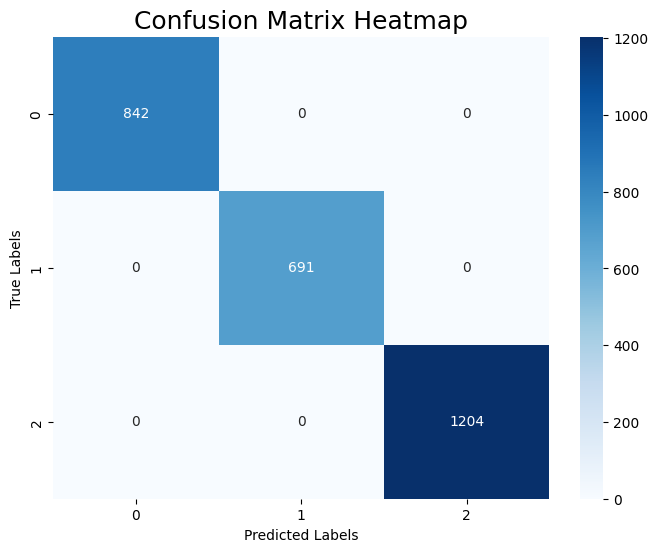

In [16]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

y_pred = dt_model.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("\nClassification Report:")
print(class_report)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=dt_model.classes_, yticklabels=dt_model.classes_)
plt.title("Confusion Matrix Heatmap", fontsize=18)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

<div style="display: inline-block; padding: 10px 15px; border-radius: 20px; background: linear-gradient(135deg, #ff7f50, #ff1493); box-shadow: 5px 5px 15px rgba(0, 0, 0, 0.3); font-size: 30px; font-family: 'Helvetica Neue', Arial, sans-serif; color: #ffffff; text-align: center; border: 2px solid #ffffff;">Thanks !</div><br><br>

### If you have any questions, please feel free to ask me a question and use the code freely !

<a href="https://www.kaggle.com/lko9911" target="_blank" style="display: inline-block; background-color: #3a86ff; color: #fff; text-decoration: none; padding: 5px 10px; border-radius: 10px; margin: 15px; font-size: 25px;">Kaggle</a>
<a href="https://github.com/lko9911" target="_blank" style="display: inline-block; background-color: #ff8c00; color: #ffffff; text-decoration: none; padding: 5px 20px; border-radius: 15px; margin: 15px; border: 2px solid #ff4500; font-size: 25px; font-family: 'Arial', sans-serif; font-weight: bold; transition: all 0.3s ease;">GitHub</a>